In [60]:
%matplotlib inline
import pandas as pd

def date_parser(string_list):
    return [time.ctime(float(x)) for x in string_list]

df = pd.read_csv("../data/dynamo-indexTable-output.csv", skiprows=[1])


df = df.assign(date=pd.to_datetime(df['created_at'], unit='s').values)

def to_minute_of_day(timestamp):
    minute = (timestamp.hour * 60) + timestamp.minute
    return round(minute / 30) * 30

df = df.assign(minute_of_day=df['date'].map(to_minute_of_day))

In [150]:
minute_of_day_result = {}
resampled_result = {}

for sub_id in df['subreddit_id'].unique():
    sub_posts = df[df['subreddit_id'] == sub_id]
    minute_of_day_result[sub_id] = sub_posts['minute_of_day']
    resampled_result[sub_id] = sub_posts.resample('D', on='date').count()['title']

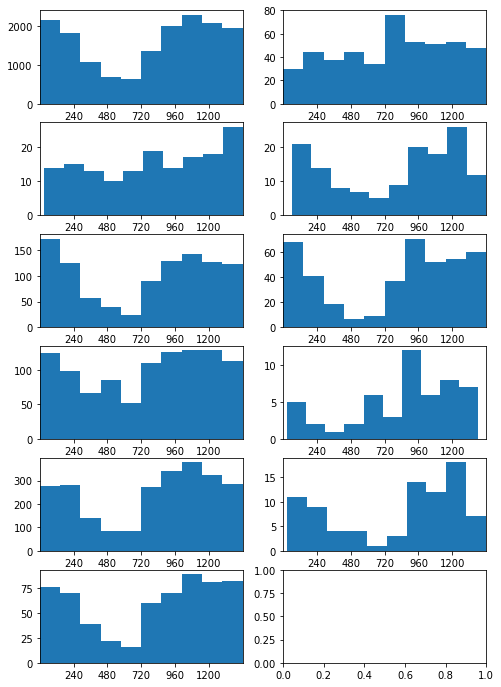

In [147]:
import matplotlib.pyplot as plt

total_plots = 11
num_rows = 6
num_cols = 2


fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols)
fig.set_size_inches(8,12)
for row_n in range(num_rows):
    for col_n in range(num_cols):
        i = (col_n * num_rows) + row_n
        if i >= total_plots:
            continue
        
        sub_id = df['subreddit_id'].unique()[i]
        ax = axs[row_n][col_n]
        ax.hist(minute_of_day_result[sub_id])
#         result[sub_id].hist(bins=48, ax=ax)
        ax.set_xlim(0, 1440)
        ax.set_xticks([240, 480, 720, 960, 1200])


Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


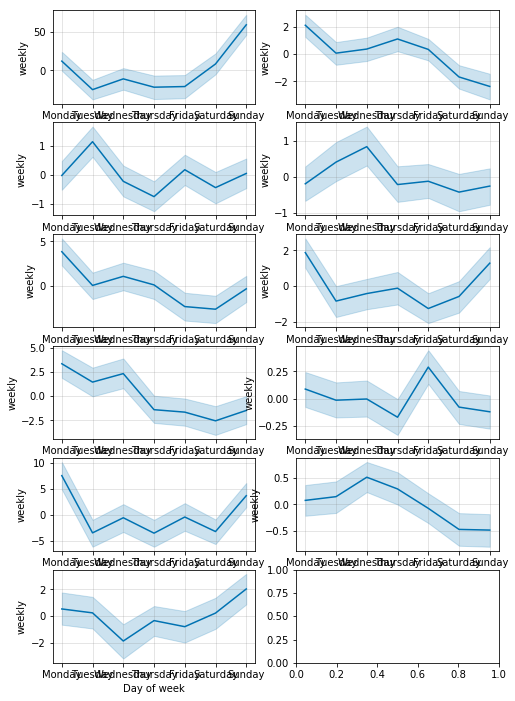

In [219]:
import matplotlib.pyplot as plt
from fbprophet import Prophet

resampled_result_list = [v for _, v in resampled_result.items()]

def to_prophet_df(index):
    series = resampled_result_list[index]
    return pd.DataFrame({"ds": series.index, "y": series.values})

total_plots = 11
num_rows = 6
num_cols = 2


fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols)
fig.set_size_inches(8,12)
for row_n in range(num_rows):
    for col_n in range(num_cols):
        i = (col_n * num_rows) + row_n
        if i >= total_plots:
            continue
        
        sub_id = df['subreddit_id'].unique()[i]
        
        m = Prophet(mcmc_samples=500)
        m.fit(to_prophet_df(i));

        ax = axs[row_n][col_n]
        m.plot_weekly(ax=ax,uncertainty=True, weekly_start=1)
